<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-iss.png' width=15% style="float: right;">
<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-nus.png' width=15% style="float: right;">


---

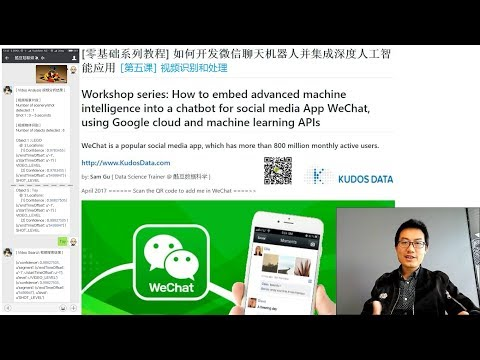

In [1]:
import IPython.display
IPython.display.YouTubeVideo('leVZjVahdKs')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='https://www.iss.nus.edu.sg/images/default-source/About-Us/7.6.1-teaching-staff/sam-website.tmb-.png' width=8% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">


by: GU Zhan (Sam)


October 2018 : Update to support Python 3 in local machine, e.g. iss-vm.


April 2017 ======= Scan the QR code to become trainer's friend in WeChat =====>>

### 第五课：视频识别和处理
### Lesson 5: Video Recognition & Processing

* 识别视频消息中的物体名字 (Label Detection: Detect entities within the video, such as "dog", "flower" or "car")
* 识别视频的场景片段 (Shot Change Detection: Detect scene changes within the video)
* 识别受限内容 (Explicit Content Detection: Detect adult content within a video)
* 生成视频字幕 (Video Transcription BETA: Transcribes video content in English)


### Using Google Cloud Platform's Machine Learning APIs

From the same API console, choose "Dashboard" on the left-hand menu and "Enable API".

Enable the following APIs for your project (search for them) if they are not already enabled:
<ol>
**<li> Google Cloud Video Intelligence API </li>**
</ol>

Finally, because we are calling the APIs from Python (clients in many other languages are available), let's install the Python package (it's not installed by default on Datalab)

In [2]:
# Copyright 2016 Google Inc. Licensed under the Apache License, Version 2.0 (the "License"); 
# !pip install --upgrade google-api-python-client

---

### 短片预览  / Video viewing

In [3]:
# 多媒体文件的二进制base64码转换 (Define media pre-processing functions)

# Import the base64 encoding library.
import base64, io, sys, IPython.display

# Python 2
if sys.version_info[0] < 3:
    import urllib2
# Python 3
else:
    import urllib.request

# Pass the media data to an encoding function.
def encode_media(media_file):
    with io.open(media_file, "rb") as media_file:
        media_content = media_file.read()
# Python 2
    if sys.version_info[0] < 3:
        return base64.b64encode(media_content).decode('ascii')
# Python 3
    else:
        return base64.b64encode(media_content).decode('utf-8')

In [4]:
video_file = 'reference/video_IPA.mp4'
# video_file = 'reference/SampleVideo_360x240_1mb.mp4'
# video_file = 'reference/SampleVideo_360x240_2mb.mp4'

In [5]:
IPython.display.HTML(data=
        '''<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
        .format(encode_media(video_file)))

---

## <span style="color:blue">Install the client library</span> for Video Intelligence / Processing

In [6]:
!pip install --upgrade google-cloud-videointelligence

Requirement already up-to-date: google-cloud-videointelligence in /home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages (1.5.0)


---

In [7]:
# Imports the Google Cloud client library
from google.cloud import videointelligence

In [8]:
# [Optional] Display location of service account API key if defined in GOOGLE_APPLICATION_CREDENTIALS
!echo $GOOGLE_APPLICATION_CREDENTIALS

In [9]:

##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
# video_client = videointelligence.VideoIntelligenceServiceClient()

# 
# (2) Instantiates a client - using 'service account json' file
video_client = videointelligence.VideoIntelligenceServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################


### * 识别视频消息中的物体名字 (Label Detection: Detect entities within the video, such as "dog", "flower" or "car")
https://cloud.google.com/video-intelligence/docs/analyze-labels


didi_video_label_detection()


In [10]:
from google.cloud import videointelligence

def didi_video_label_detection(path):
    """Detect labels given a local file path. (Demo)"""
    """ Detects labels given a GCS path. (Exercise / Workshop Enhancement)"""

##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     video_client = videointelligence.VideoIntelligenceServiceClient()

# 
# (2) Instantiates a client - using 'service account json' file
    video_client = videointelligence.VideoIntelligenceServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    features = [videointelligence.enums.Feature.LABEL_DETECTION]

    with io.open(path, 'rb') as movie:
        input_content = movie.read()

    operation = video_client.annotate_video(
        features=features, input_content=input_content)
    print('\nProcessing video for label annotations:')

    result = operation.result(timeout=90)
    print('\nFinished processing.')

    # Process video/segment level label annotations
    segment_labels = result.annotation_results[0].segment_label_annotations
    for i, segment_label in enumerate(segment_labels):
        print('Video label description: {}'.format(
            segment_label.entity.description))
        for category_entity in segment_label.category_entities:
            print('\tLabel category description: {}'.format(
                category_entity.description))

        for i, segment in enumerate(segment_label.segments):
            start_time = (segment.segment.start_time_offset.seconds +
                          segment.segment.start_time_offset.nanos / 1e9)
            end_time = (segment.segment.end_time_offset.seconds +
                        segment.segment.end_time_offset.nanos / 1e9)
            positions = '{}s to {}s'.format(start_time, end_time)
            confidence = segment.confidence
            print('\tSegment {}: {}'.format(i, positions))
            print('\tConfidence: {}'.format(confidence))
        print('\n')

    # Process shot level label annotations
    shot_labels = result.annotation_results[0].shot_label_annotations
    for i, shot_label in enumerate(shot_labels):
        print('Shot label description: {}'.format(
            shot_label.entity.description))
        for category_entity in shot_label.category_entities:
            print('\tLabel category description: {}'.format(
                category_entity.description))

        for i, shot in enumerate(shot_label.segments):
            start_time = (shot.segment.start_time_offset.seconds +
                          shot.segment.start_time_offset.nanos / 1e9)
            end_time = (shot.segment.end_time_offset.seconds +
                        shot.segment.end_time_offset.nanos / 1e9)
            positions = '{}s to {}s'.format(start_time, end_time)
            confidence = shot.confidence
            print('\tSegment {}: {}'.format(i, positions))
            print('\tConfidence: {}'.format(confidence))
        print('\n')

    # Process frame level label annotations
    frame_labels = result.annotation_results[0].frame_label_annotations
    for i, frame_label in enumerate(frame_labels):
        print('Frame label description: {}'.format(
            frame_label.entity.description))
        for category_entity in frame_label.category_entities:
            print('\tLabel category description: {}'.format(
                category_entity.description))

        # Each frame_label_annotation has many frames,
        # here we print information only about the first frame.
        frame = frame_label.frames[0]
        time_offset = frame.time_offset.seconds + frame.time_offset.nanos / 1e9
        print('\tFirst frame time offset: {}s'.format(time_offset))
        print('\tFirst frame confidence: {}'.format(frame.confidence))
        print('\n')
        
    return segment_labels, shot_labels, frame_labels

In [11]:
# video_file = 'reference/video_IPA.mp4'

In [12]:
didi_segment_labels, didi_shot_labels, didi_frame_labels = didi_video_label_detection(video_file)


Processing video for label annotations:

Finished processing.
Video label description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9247158169746399


Video label description: lego
	Label category description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9257180094718933


Video label description: robot
	Label category description: technology
	Label category description: machine
	Segment 0: 0.0s to 5.5s
	Confidence: 0.32479360699653625


Shot label description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9247158169746399


Shot label description: lego
	Label category description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9257180094718933


Shot label description: robot
	Label category description: technology
	Label category description: machine
	Segment 0: 0.0s to 5.5s
	Confidence: 0.32479360699653625




In [13]:
didi_segment_labels

[entity {
  entity_id: "/m/0138tl"
  description: "toy"
  language_code: "en-US"
}
segments {
  segment {
    start_time_offset {
    }
    end_time_offset {
      seconds: 5
      nanos: 500000000
    }
  }
  confidence: 0.9247158169746399
}
, entity {
  entity_id: "/m/04ndr"
  description: "lego"
  language_code: "en-US"
}
category_entities {
  entity_id: "/m/0138tl"
  description: "toy"
  language_code: "en-US"
}
segments {
  segment {
    start_time_offset {
    }
    end_time_offset {
      seconds: 5
      nanos: 500000000
    }
  }
  confidence: 0.9257180094718933
}
, entity {
  entity_id: "/m/06fgw"
  description: "robot"
  language_code: "en-US"
}
category_entities {
  entity_id: "/m/07c1v"
  description: "technology"
  language_code: "en-US"
}
category_entities {
  entity_id: "/m/0dkw5"
  description: "machine"
  language_code: "en-US"
}
segments {
  segment {
    start_time_offset {
    }
    end_time_offset {
      seconds: 5
      nanos: 500000000
    }
  }
  confidence: 0

In [14]:
didi_shot_labels

[entity {
  entity_id: "/m/0138tl"
  description: "toy"
  language_code: "en-US"
}
segments {
  segment {
    start_time_offset {
    }
    end_time_offset {
      seconds: 5
      nanos: 500000000
    }
  }
  confidence: 0.9247158169746399
}
, entity {
  entity_id: "/m/04ndr"
  description: "lego"
  language_code: "en-US"
}
category_entities {
  entity_id: "/m/0138tl"
  description: "toy"
  language_code: "en-US"
}
segments {
  segment {
    start_time_offset {
    }
    end_time_offset {
      seconds: 5
      nanos: 500000000
    }
  }
  confidence: 0.9257180094718933
}
, entity {
  entity_id: "/m/06fgw"
  description: "robot"
  language_code: "en-US"
}
category_entities {
  entity_id: "/m/07c1v"
  description: "technology"
  language_code: "en-US"
}
category_entities {
  entity_id: "/m/0dkw5"
  description: "machine"
  language_code: "en-US"
}
segments {
  segment {
    start_time_offset {
    }
    end_time_offset {
      seconds: 5
      nanos: 500000000
    }
  }
  confidence: 0

In [15]:
didi_frame_labels

[]

### * 识别视频的场景片段 (Shot Change Detection: Detect scene changes within the video)
https://cloud.google.com/video-intelligence/docs/shot_detection


didi_video_shot_detection()


In [16]:
from google.cloud import videointelligence

def didi_video_shot_detection(path):
    """ Detects camera shot changes given a local file path """

##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     video_client = videointelligence.VideoIntelligenceServiceClient()

# 
# (2) Instantiates a client - using 'service account json' file
    video_client = videointelligence.VideoIntelligenceServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    features = [videointelligence.enums.Feature.SHOT_CHANGE_DETECTION]
#     features = [videointelligence.enums.Feature.LABEL_DETECTION]

    with io.open(path, 'rb') as movie:
        input_content = movie.read()
    
#     operation = video_client.annotate_video(path, features=features)
    operation = video_client.annotate_video(features=features, input_content=input_content)
    print('\nProcessing video for shot change annotations:')

    result = operation.result(timeout=180)
    print('\nFinished processing.')

    for i, shot in enumerate(result.annotation_results[0].shot_annotations):
        start_time = (shot.start_time_offset.seconds +
                      shot.start_time_offset.nanos / 1e9)
        end_time = (shot.end_time_offset.seconds +
                    shot.end_time_offset.nanos / 1e9)
        print('\tShot {}: {} to {}'.format(i, start_time, end_time))
        
    return result


In [17]:
# video_file = 'reference/video_IPA.mp4'

In [18]:
didi_result = didi_video_shot_detection(video_file)


Processing video for shot change annotations:

Finished processing.
	Shot 0: 0.0 to 5.5


In [19]:
didi_result

annotation_results {
  shot_annotations {
    start_time_offset {
    }
    end_time_offset {
      seconds: 5
      nanos: 500000000
    }
  }
}

### * 识别受限内容 (Explicit Content Detection: Detect adult content within a video)



didi_video_safesearch_detection()


In [20]:
from google.cloud import videointelligence

def didi_video_safesearch_detection(path):
    """ Detects explicit content given a local file path. """

##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     video_client = videointelligence.VideoIntelligenceServiceClient()

# 
# (2) Instantiates a client - using 'service account json' file
    video_client = videointelligence.VideoIntelligenceServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    features = [videointelligence.enums.Feature.EXPLICIT_CONTENT_DETECTION]

    with io.open(path, 'rb') as movie:
        input_content = movie.read()
    
#     operation = video_client.annotate_video(path, features=features)
    operation = video_client.annotate_video(features=features, input_content=input_content)
    print('\nProcessing video for explicit content annotations:')

    result = operation.result(timeout=90)
    print('\nFinished processing.')

    likely_string = ("Unknown", "Very unlikely", "Unlikely", "Possible",
                     "Likely", "Very likely")

    # first result is retrieved because a single video was processed
    for frame in result.annotation_results[0].explicit_annotation.frames:
        frame_time = frame.time_offset.seconds + frame.time_offset.nanos / 1e9
        print('Time: {}s'.format(frame_time))
        print('\tpornography: {}'.format(
            likely_string[frame.pornography_likelihood]))
        
    return result


In [21]:
# video_file = 'reference/video_IPA.mp4'

In [22]:
didi_result = didi_video_safesearch_detection(video_file)


Processing video for explicit content annotations:

Finished processing.
Time: 0.070218s
	pornography: Very unlikely
Time: 1.262424s
	pornography: Very unlikely
Time: 2.265889s
	pornography: Very unlikely
Time: 3.2359999999999998s
	pornography: Very unlikely
Time: 4.288838s
	pornography: Very unlikely
Time: 5.358866s
	pornography: Very unlikely


### <span style="color:red">[ Beta Features ]</span>  * 生成视频字幕 (Video Transcription BETA: Transcribes video content in English)

https://cloud.google.com/video-intelligence/docs/beta

Cloud Video Intelligence API includes the following beta features in version v1p1beta1:

Speech Transcription - the Video Intelligence API can transcribe speech to text from the audio in supported video files. Learn more.


In [23]:
# Beta Features: videointelligence_v1p1beta1
from google.cloud import videointelligence_v1p1beta1 as videointelligence

def didi_video_speech_transcription(path):
    """Transcribe speech given a local file path."""

##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     video_client = videointelligence.VideoIntelligenceServiceClient()

# 
# (2) Instantiates a client - using 'service account json' file
    video_client = videointelligence.VideoIntelligenceServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    features = [videointelligence.enums.Feature.SPEECH_TRANSCRIPTION]

    with io.open(path, 'rb') as movie:
        input_content = movie.read()
    
    config = videointelligence.types.SpeechTranscriptionConfig(
        language_code='en-US',
        enable_automatic_punctuation=True)
    video_context = videointelligence.types.VideoContext(
        speech_transcription_config=config)

#     operation = video_client.annotate_video(
#         input_uri, 
#         features=features,
#         video_context=video_context)
    operation = video_client.annotate_video(
        features=features,
        input_content=input_content, 
        video_context=video_context)

    print('\nProcessing video for speech transcription.')

    result = operation.result(timeout=180)   
    
    # There is only one annotation_result since only
    # one video is processed.
    annotation_results = result.annotation_results[0]
    speech_transcription = annotation_results.speech_transcriptions[0]
    
    if str(speech_transcription) == '': # result.annotation_results[0].speech_transcriptions[0] == ''
        print('\nNOT FOUND: video for speech transcription.')
    else:
        alternative = speech_transcription.alternatives[0]
        print('Transcript: {}'.format(alternative.transcript))
        print('Confidence: {}\n'.format(alternative.confidence))

        print('Word level information:')
        for word_info in alternative.words:
            word = word_info.word
            start_time = word_info.start_time
            end_time = word_info.end_time
            print('\t{}s - {}s: {}'.format(
                start_time.seconds + start_time.nanos * 1e-9,
                end_time.seconds + end_time.nanos * 1e-9,
                word))

    return result
        

In [24]:
# video_file = 'reference/video_IPA.mp4'

In [25]:
didi_result = didi_video_speech_transcription(video_file)


Processing video for speech transcription.
Transcript: Hi everyone. It's great to meet you in intelligent process automation course.
Confidence: 0.8206615447998047

Word level information:
	0.0s - 0.30000000000000004s: Hi
	0.30000000000000004s - 0.8s: everyone.
	0.8s - 1.6s: It's
	1.6s - 1.7000000000000002s: great
	1.7000000000000002s - 2.1s: to
	2.1s - 2.2s: meet
	2.2s - 2.5s: you
	2.5s - 2.6s: in
	2.6s - 3.5s: intelligent
	3.5s - 4.1s: process
	4.1s - 4.7s: automation
	4.7s - 5.4s: course.


In [26]:
didi_result

annotation_results {
  speech_transcriptions {
    alternatives {
      transcript: "Hi everyone. It\'s great to meet you in intelligent process automation course."
      confidence: 0.8206615447998047
      words {
        start_time {
        }
        end_time {
          nanos: 300000000
        }
        word: "Hi"
      }
      words {
        start_time {
          nanos: 300000000
        }
        end_time {
          nanos: 800000000
        }
        word: "everyone."
      }
      words {
        start_time {
          nanos: 800000000
        }
        end_time {
          seconds: 1
          nanos: 600000000
        }
        word: "It\'s"
      }
      words {
        start_time {
          seconds: 1
          nanos: 600000000
        }
        end_time {
          seconds: 1
          nanos: 700000000
        }
        word: "great"
      }
      words {
        start_time {
          seconds: 1
          nanos: 700000000
        }
        end_time {
          seconds

---

## <span style="color:blue">Wrap cloud APIs into Functions() for conversational virtual assistant (VA):</span>
Reuse above defined Functions().

In [35]:
def didi_video_processing(video_file):
    didi_video_reply  = u'[ Video 视频处理结果 ]\n\n'
    
    didi_video_reply += u'[ didi_video_label_detection 识别视频消息中的物体名字 ]\n\n' \
    + str(didi_video_label_detection(video_file)) + u'\n\n'
    
    didi_video_reply += u'[ didi_video_shot_detection 识别视频的场景片段 ]\n\n' \
    + str(didi_video_shot_detection(video_file)) + u'\n\n'
    
    didi_video_reply += u'[ didi_video_safesearch_detection 识别受限内容 ]\n\n' \
    + str(didi_video_safesearch_detection(video_file)) + u'\n\n'
    
    didi_video_reply += u'[ didi_video_speech_transcription 生成视频字幕 ]\n\n' \
    + str(didi_video_speech_transcription(video_file)) + u'\n\n'
    
    return didi_video_reply

In [37]:
# [Optional] Agile testing:
# parm_video_response = didi_video_processing(video_file)
# print(parm_video_response)


Processing video for label annotations:

Finished processing.
Video label description: lego
	Label category description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9257180094718933


Video label description: robot
	Label category description: technology
	Label category description: machine
	Segment 0: 0.0s to 5.5s
	Confidence: 0.32479360699653625


Video label description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9247158169746399


Shot label description: lego
	Label category description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9257180094718933


Shot label description: robot
	Label category description: technology
	Label category description: machine
	Segment 0: 0.0s to 5.5s
	Confidence: 0.32479360699653625


Shot label description: toy
	Segment 0: 0.0s to 5.5s
	Confidence: 0.9247158169746399



Processing video for shot change annotations:

Finished processing.
	Shot 0: 0.0 to 5.5

Processing video for explicit content annotations:

Finished processing.
Time: 0.070218s
	porn

'[ Video 视频处理结果 ]\n\n[ didi_video_label_detection 识别视频消息中的物体名字 ]\n\n([entity {\n  entity_id: "/m/04ndr"\n  description: "lego"\n  language_code: "en-US"\n}\ncategory_entities {\n  entity_id: "/m/0138tl"\n  description: "toy"\n  language_code: "en-US"\n}\nsegments {\n  segment {\n    start_time_offset {\n    }\n    end_time_offset {\n      seconds: 5\n      nanos: 500000000\n    }\n  }\n  confidence: 0.9257180094718933\n}\n, entity {\n  entity_id: "/m/06fgw"\n  description: "robot"\n  language_code: "en-US"\n}\ncategory_entities {\n  entity_id: "/m/07c1v"\n  description: "technology"\n  language_code: "en-US"\n}\ncategory_entities {\n  entity_id: "/m/0dkw5"\n  description: "machine"\n  language_code: "en-US"\n}\nsegments {\n  segment {\n    start_time_offset {\n    }\n    end_time_offset {\n      seconds: 5\n      nanos: 500000000\n    }\n  }\n  confidence: 0.32479360699653625\n}\n, entity {\n  entity_id: "/m/0138tl"\n  description: "toy"\n  language_code: "en-US"\n}\nsegments {\n  segm

**Define a global variable for future 'video search' function enhancement**

In [38]:
parm_video_response = {} # Define a global variable for future 'video search' function enhancement

---

## <span style="color:blue">Start interactive conversational virtual assistant (VA):</span>

### Import ItChat, etc. 导入需要用到的一些功能程序库：

In [39]:
import itchat
from itchat.content import *

### Log in using QR code image / 用微信App扫QR码图片来自动登录

In [43]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: 命令行显示QR图片

Getting uuid of QR code.


                                                                              
  ██████████████    ██      ████      ██  ████    ██  ██      ██████████████  
  ██          ██    ██        ██        ██  ██      ██        ██          ██  
  ██  ██████  ██  ██████████    ████  ██    ████    ██  ████  ██  ██████  ██  
  ██  ██████  ██  ██  ████    ████  ██  ██████      ████████  ██  ██████  ██  
  ██  ██████  ██    ██    ████    ██  ████      ██  ████      ██  ██████  ██  
  ██          ██      ██        ██  ██  ██████  ██    ██      ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                    ██  ██  ████████    ████  ██  ████  ████                  
        ████  ████  ████    ██    ██    ██      ████                ████      
            ██  ████              ██      ████████  ██  ████  ██████    ██    
    ██        ██  ██  ██████  ██  ██  ██    ██████  ██  ████████  ██      ██  
    ████    ██  ██      ██  ██  ██  ██████  ██  ████

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


In [44]:
# @itchat.msg_register([VIDEO], isGroupChat=True)
@itchat.msg_register([VIDEO])
def download_files(msg):
    msg.download(msg.fileName)
    print('\nDownloaded video file name is: %s' % msg['FileName'])
    
    ##############################################################################################################
    #                                          call video analysis APIs                                          #
    ##############################################################################################################
    global parm_video_response # save into global variable, which can be accessed by next WeChat keyword search
    
    # python 2 version WeChat Bot
    #  parm_video_response = KudosData_VIDEO_DETECTION(encode_media(msg['FileName']))
    
    # python 3 version WeChat Bot
    parm_video_response = didi_video_processing(msg['FileName'])

    
    ##############################################################################################################
    #                                          format video API results                                          #
    ##############################################################################################################
    
    # python 2 version WeChat Bot
    # video_analysis_reply = KudosData_video_generate_reply(parm_video_response)

    # python 3 version WeChat Bot
    video_analysis_reply = parm_video_response # Exercise / Workshop Enhancement: To pase and format result nicely.
    
    
    print ('')
    print(video_analysis_reply)
    return video_analysis_reply

In [45]:
itchat.run()

Start auto replying.



Downloaded video file name is: 181028-160905.mp4

Processing video for label annotations:

Finished processing.
Video label description: fisheye lens
	Label category description: photography
	Segment 0: 0.0s to 5.675675s
	Confidence: 0.919499397277832


Video label description: toy
	Segment 0: 0.0s to 5.675675s
	Confidence: 0.41455480456352234


Shot label description: fisheye lens
	Label category description: photography
	Segment 0: 0.0s to 5.675675s
	Confidence: 0.9222605228424072


Shot label description: toy
	Segment 0: 0.0s to 5.675675s
	Confidence: 0.34078821539878845



Processing video for shot change annotations:

Finished processing.
	Shot 0: 0.0 to 5.675675

Processing video for explicit content annotations:

Finished processing.
Time: 0.204446s
	pornography: Very unlikely
Time: 1.22106s
	pornography: Very unlikely
Time: 2.311796s
	pornography: Very unlikely
Time: 3.504806s
	pornography: Very unlikely
Time: 4.3297229999999995s
	pornography: Very unlikely
Time: 5.282879s
	po

Bye~


---

In [47]:
# interupt kernel, then logout
itchat.logout() # 安全退出

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

LOG OUT!


---

## <span style="color:blue">Exercise / Workshop Enhancement:</span>


<font color='blue'>
<font color='blue'>
[提问 1] 使用文字来搜索视频内容？需要怎么处理？ 
[Question 1] Can we use text (keywords) as input to search video content? How?
</font>



<font color='blue'>
<font color='blue'>
[提问 2] 使用图片来搜索视频内容？需要怎么处理？ 
[Question 2] Can we use an image as input to search video content? How?
</font>

In [ ]:
'''

# Private conversational mode / 单聊模式，基于关键词进行视频搜索：
@itchat.msg_register([TEXT])
def text_reply(msg):
#     if msg['isAt']:
        list_keywords = [x.strip() for x in msg['Text'].split(',')]
        # call video search function:
        search_responses = KudosData_search(list_keywords) # return is a list
        # Format search results:
        search_reply = u'[ Video Search 视频搜索结果 ]' + '\n'
        if len(search_responses) == 0:
            search_reply += u'[ Nill 无结果 ]'
        else:
            for i in range(len(search_responses)): search_reply += '\n' + str(search_responses[i])
        print ('')
        print (search_reply)
        return search_reply
    
    '''

In [ ]:
'''

# Group conversational mode / 群聊模式，基于关键词进行视频搜索：
@itchat.msg_register([TEXT], isGroupChat=True)
def text_reply(msg):
    if msg['isAt']:
        list_keywords = [x.strip() for x in msg['Text'].split(',')]
        # call video search function:
        search_responses = KudosData_search(list_keywords) # return is a list
        # Format search results:
        search_reply = u'[ Video Search 视频搜索结果 ]' + '\n'
        if len(search_responses) == 0:
            search_reply += u'[ Nill 无结果 ]'
        else:
            for i in range(len(search_responses)): search_reply += '\n' + str(search_responses[i])
        print ('')
        print (search_reply)
        return search_reply
    
    '''

### 恭喜您！已经完成了：

### 第五课：视频识别和处理
### Lesson 5: Video Recognition & Processing

* 识别视频消息中的物体名字 (Label Detection: Detect entities within the video, such as "dog", "flower" or "car")
* 识别视频的场景片段 (Shot Change Detection: Detect scene changes within the video)
* 识别受限内容 (Explicit Content Detection: Detect adult content within a video)
* 生成视频字幕 (Video Transcription BETA: Transcribes video content in English)


### 下一课是:

### 第六课：交互式虚拟助手的智能应用
### Lesson 6: Interactive Conversatioinal Virtual Assistant Applications / Intelligent Process Automations
* 虚拟员工: 贷款填表申请审批一条龙自动化流程 （Virtual Worker: When Chat-bot meets RPA-bot for mortgage loan application automation) 
* 虚拟员工: 文字指令交互（Conversational automation using text/message command) 
* 虚拟员工: 语音指令交互（Conversational automation using speech/voice command) 
* 虚拟员工: 多种语言交互（Conversational automation with multiple languages)

<img src='reference/WeChat_SamGu_QR.png' width=80% style="float: left;">


---